## Copy the examples on Exmplanatory power assumptions of linear regression.

In [25]:
import math
import warnings

from IPython.display import display
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import linear_model
import statsmodels.formula.api as smf

# Display preferences.
%matplotlib inline
pd.options.display.float_format = '{:.3f}'.format

# Suppress annoying harmless error.
warnings.filterwarnings(
    action="ignore",
    module="scipy",
    message="^internal gelsd"
)
# Acquire, load, and preview the data.
data = pd.read_csv('https://tf-curricula-prod.s3.amazonaws.com/data-science/Advertising.csv')
display(data.head())

# Instantiate and fit our model.
regr = linear_model.LinearRegression()
Y = data['Sales'].values.reshape(-1, 1)
X = data[['TV','Radio','Newspaper']]
regr.fit(X, Y)

# Inspect the results.
print('\nCoefficients: \n', regr.coef_)
print('\nIntercept: \n', regr.intercept_)
print('\nR-squared:')
print(regr.score(X, Y))

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.100,37.800,69.200,22.100
1,2,44.500,39.300,45.100,10.400
2,3,17.200,45.900,69.300,9.300
3,4,151.500,41.300,58.500,18.500
4,5,180.800,10.800,58.400,12.900



Coefficients: 
 [[ 0.04576465  0.18853002 -0.00103749]]

Intercept: 
 [2.93888937]

R-squared:
0.8972106381789521


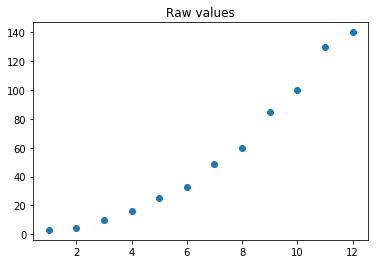

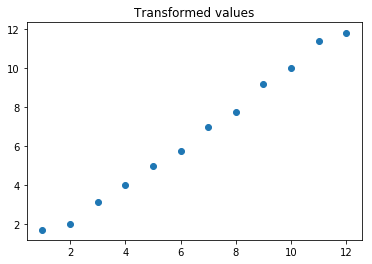

In [26]:
# Sample data.
outcome = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
feature = [3, 4, 10, 16, 25, 33, 49, 60, 85, 100, 130, 140]

# Plot the data as-is. Looks a mite quadratic.
plt.scatter(outcome, feature)
plt.title('Raw values')
plt.show()

# Create a feature using a non-linear transformation.
sqrt_feature = [math.sqrt(x) for x in  feature]


# Well now isn't that nice.
plt.scatter(outcome, sqrt_feature)
plt.title('Transformed values')
plt.show()

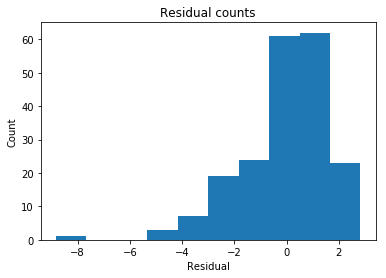

In [27]:
# Extract predicted values.
predicted = regr.predict(X).ravel()
actual = data['Sales']

# Calculate the error, also called the residual.
residual = actual - predicted

# This looks a bit concerning.
plt.hist(residual)
plt.title('Residual counts')
plt.xlabel('Residual')
plt.ylabel('Count')
plt.show()

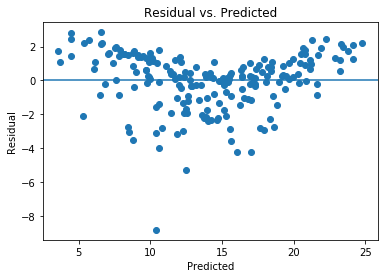

In [28]:
plt.scatter(predicted, residual)
plt.xlabel('Predicted')
plt.ylabel('Residual')
plt.axhline(y=0)
plt.title('Residual vs. Predicted')
plt.show()

In [29]:
correlation_matrix = X.corr()
data.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.100,37.800,69.200,22.100
1,2,44.500,39.300,45.100,10.400
2,3,17.200,45.900,69.300,9.300
3,4,151.500,41.300,58.500,18.500
4,5,180.800,10.800,58.400,12.900


In [32]:
data.drop(data.columns[0], axis=1, inplace=True)

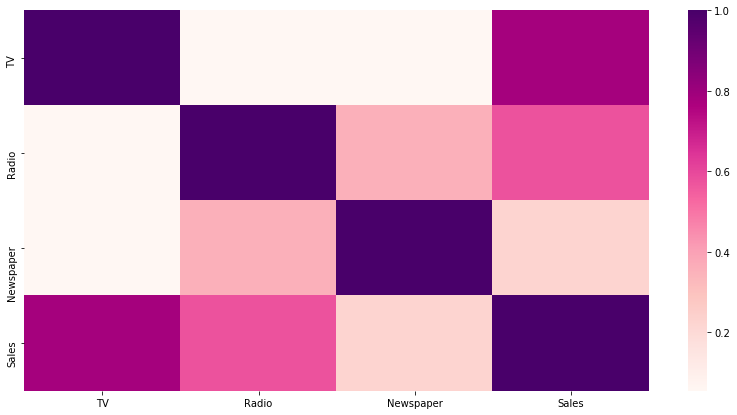

In [33]:
f, ax = plt.subplots(figsize=(14, 7))
sns.heatmap(data.corr(), cmap='RdPu')

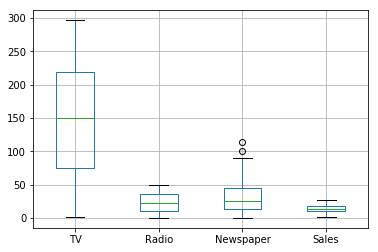

In [34]:
data.boxplot()

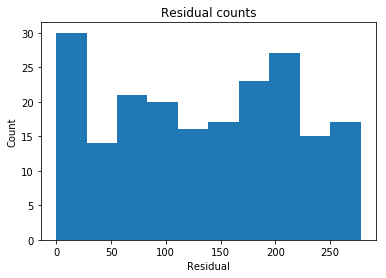

In [120]:
# Extract predicted values.
predicted1 = regr.predict(X).ravel()
actual1 = data['TV']

# Calculate the error, also called the residual.
residual1 = actual1 - predicted1

# This looks a bit concerning.
plt.hist(residual1)
plt.title('Residual counts')
plt.xlabel('Residual')
plt.ylabel('Count')
plt.show()


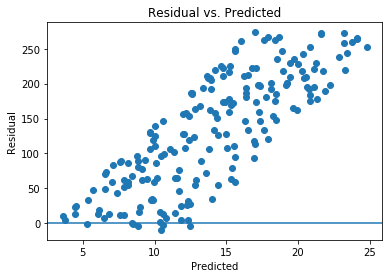

In [48]:
plt.scatter(predicted1, residual1)
plt.xlabel('Predicted')
plt.ylabel('Residual')
plt.axhline(y=0)
plt.title('Residual vs. Predicted')
plt.show()

In [91]:
data['log_TV'] = np.log(data['TV'])

In [93]:
regr = linear_model.LinearRegression()
Y = data['Sales'].values.reshape(-1,1)

# Taking out Newspaper because that doesn't seem to add much value to the model, according to the coefficients.
X = data[['log_TV','Radio', 'Newspaper']]
regr.fit(X, Y)

# Inspect the results.
print('\nCoefficients: \n', regr.coef_)
print('\nIntercept: \n', regr.intercept_)
print('\nR-squared:')
print(regr.score(X, Y))


Coefficients: 
 [[ 3.93617857e+00  2.06700329e-01 -2.53093402e-03]]

Intercept: 
 [-9.09887557]

R-squared:
0.9066722324831502


In [94]:
## Once we np.log('TV'), we can see that our R-squared have improved.

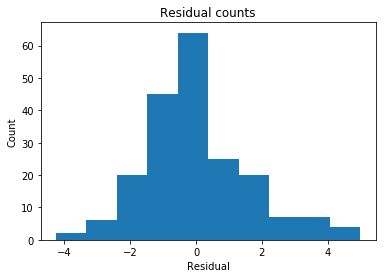

In [95]:
# Extract predicted values.
predicted5 = regr.predict(X).ravel()
actual5 = data['Sales']

# Calculate the error, also called the residual.
residual5 = actual5 - predicted5

# This looks a bit concerning.
plt.hist(residual5)
plt.title('Residual counts')
plt.xlabel('Residual')
plt.ylabel('Count')
plt.show()

In [96]:
## Now the graph do not look skrewed.

## Heteroscedasticity

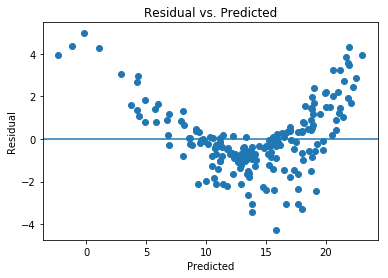

In [97]:
plt.scatter(predicted5, residual5)
plt.xlabel('Predicted')
plt.ylabel('Residual')
plt.axhline(y=0)
plt.title('Residual vs. Predicted')
plt.show()

In [98]:
## Does not look so good, we want the graph to come out more precise.

In [121]:
data['log_Sales'] = np.log(data['Sales'])

In [122]:
regr = linear_model.LinearRegression()
Y = data['Sales'].values.reshape(-1,1)

# Taking out Newspaper because that doesn't seem to add much value to the model, according to the coefficients.
X = data[['log_Sales','Radio']]
regr.fit(X, Y)

# Inspect the results.
print('\nCoefficients: \n', regr.coef_)
print('\nIntercept: \n', regr.intercept_)
print('\nR-squared:')
print(regr.score(X, Y))


Coefficients: 
 [[11.04725138  0.05723479]]

Intercept: 
 [-15.63406009]

R-squared:
0.9308797088260522


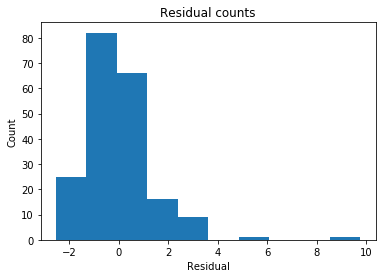

In [123]:
predicted6 = regr.predict(X).ravel()
actual6 = data['Sales']

# Calculate the error, also called the residual.
residual6 = actual6 - predicted6

# This looks a bit concerning.
plt.hist(residual6)
plt.title('Residual counts')
plt.xlabel('Residual')
plt.ylabel('Count')
plt.show()

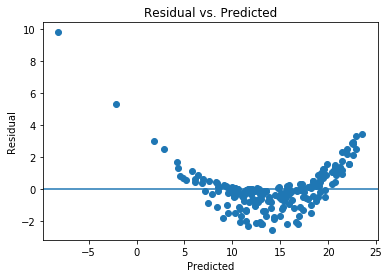

In [127]:
## log_sales show the most correlations.
plt.scatter(predicted6, residual6)
plt.xlabel('Predicted')
plt.ylabel('Residual')
plt.axhline(y=0)
plt.title('Residual vs. Predicted')
plt.show()

In [105]:
data['log_Newspaper'] = np.log(data['Newspaper'])

In [115]:
# R-Squared only 33%, we do not want to use this log_newspaper for our dataset.
regr = linear_model.LinearRegression()
Y = data['Sales'].values.reshape(-1,1)

# Taking out Newspaper because that doesn't seem to add much value to the model, according to the coefficients.
X = data[['log_Newspaper','Radio']]
regr.fit(X, Y)

# Inspect the results.
print('\nCoefficients: \n', regr.coef_)
print('\nIntercept: \n', regr.intercept_)
print('\nR-squared:')
print(regr.score(X, Y))


Coefficients: 
 [[0.08683696 0.20114643]]

Intercept: 
 [9.0759298]

R-squared:
0.3322798448711537


In [126]:
## R-Squared only 33%, decide not to persuade as it is too low. 
## And log('Radio') cannot be computed since there a 0 in the dataset.